# Рубежный контроль 1

**Тема**: Методы обработки Данных

**Курс**: Методы машинного обучения

**Группа**: ИУ5-23М

**Студент**: Костарев А. П.

**Вариант**: 7

**Задача 1 (согласно варианту)**: 7

**Задача 2 (согласно варианту)**: 27

**Дополнительная визуализация (согласно варианту)**: Ящик с усами (boxplot)

## Задание

**Задача 7.** Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения медианой.

**Задача 27.** Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе 5% и 95% квантилей.


## Выполнение задания

#### Задача №7

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('smartphones_cleaned_v6.csv', sep=",")

In [3]:
data.isna().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [4]:
data.dtypes

brand_name                    object
model                         object
price                          int64
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                   int64
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
extended_upto                float64
resolution_width               int64
resolution_height              int64
dtype: object

In [5]:
data.shape

(980, 26)

Заполним медианой значение processor_speed.

In [6]:
temp_data = data[['processor_speed']].values
size = temp_data.shape[0]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
all_data = imputer.fit_transform(temp_data)

median_df = data.copy()
median_df['processor_speed'] = all_data

In [7]:
median_df.isna().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed                0
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

#### Задача №27

In [9]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

<ipython-input-9-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


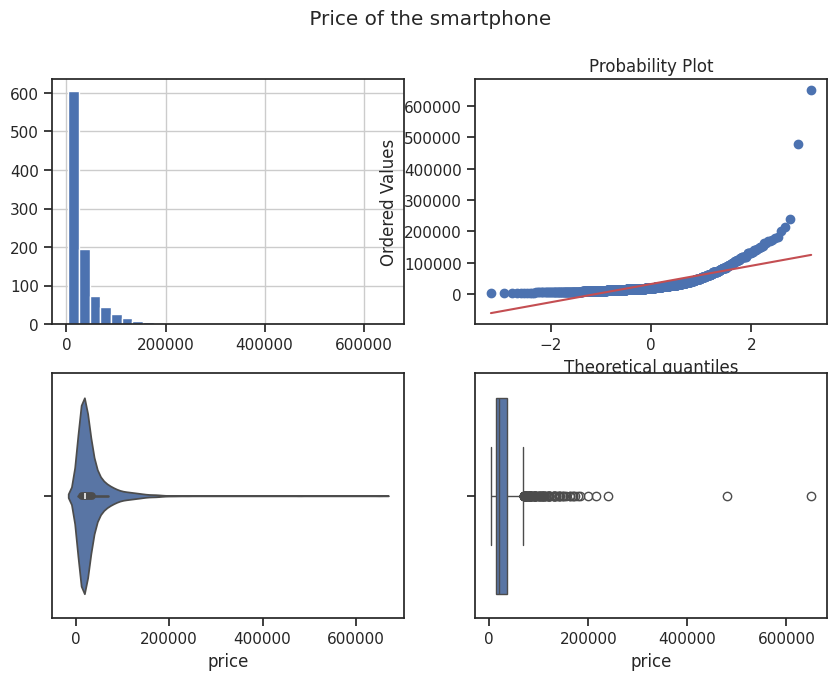

In [11]:
diagnostic_plots(median_df, 'price',' Price of the smartphone')

In [12]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
    return lower_boundary, upper_boundary

<ipython-input-9-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


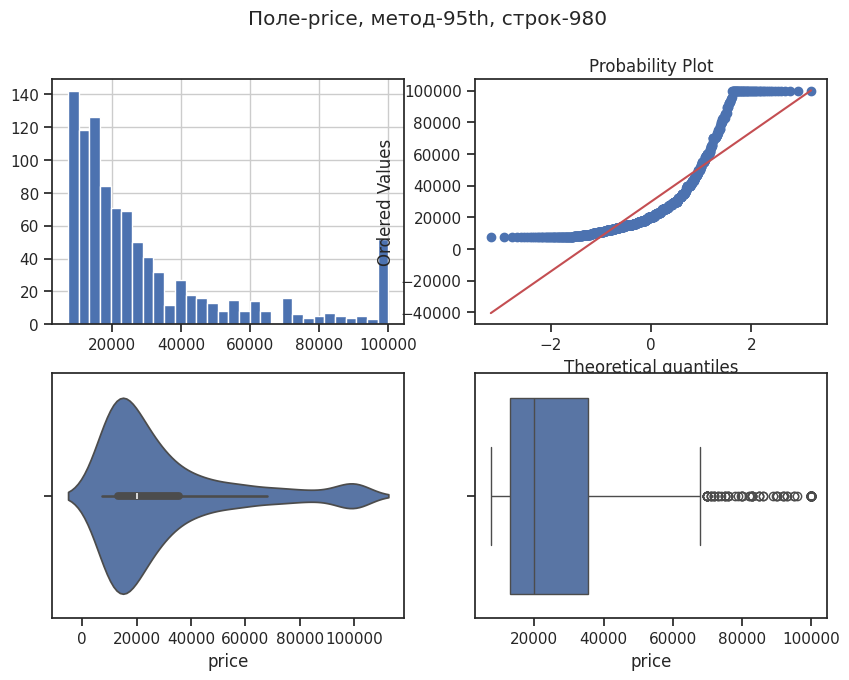

In [13]:
col = 'price'
lower_boundary, upper_boundary = get_outlier_boundaries(median_df, col)
median_df[col] = np.where(median_df[col] > upper_boundary, upper_boundary,  np.where(median_df[col] < lower_boundary, lower_boundary, median_df[col]))
title = 'Поле-{}, метод-{}, строк-{}'.format(col, '95th', median_df.shape[0])
diagnostic_plots(median_df, col, title)

Отображение в виде "Ящика с усами":

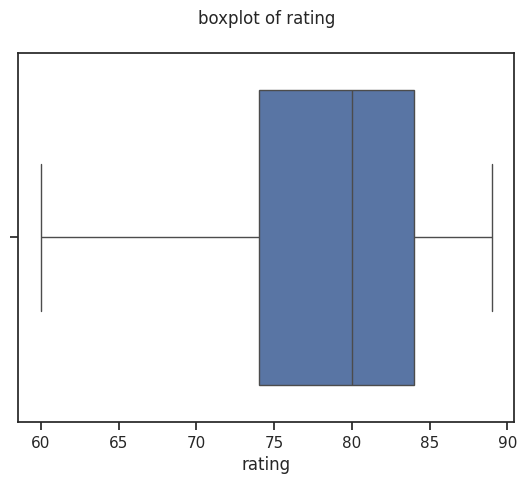

In [16]:
sns.boxplot(data=data,x='rating')
plt.title('boxplot of rating\n')
plt.show()

<Axes: xlabel='rating', ylabel='os'>

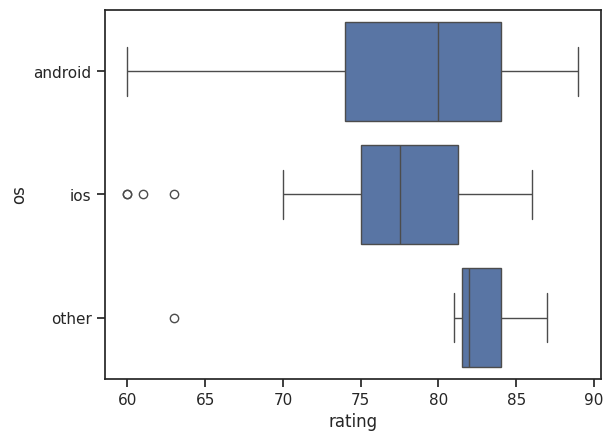

In [23]:
sns.boxplot(x='rating', y='os', data=data)